# Notebook for making graphs of the modelling results

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from typing import List


def process_netlogo_experiment_csv(
    filename: str, delete_rows: bool = True
) -> pd.DataFrame:

    if delete_rows:
        delete_redundant_rows(filename)

    df = pd.read_csv(filename, header=None, skiprows=6, nrows=12)

    df = df.transpose()

    # Set the header row as the df header
    df.columns = df.iloc[0]

    # Drop the first row
    df = df[1:]

    # Reset the index
    df = df.reset_index(drop=True)

    return df


def delete_redundant_rows(filename: str) -> None:
    """
    Delete the rows of the file that are not needed for the analysis
    """
    lines: List[str] = []
    with open(filename, "r") as f:
        lines = f.readlines()

        # Delete all lines after the 18th line
        del lines[19:]

    with open(filename, "w") as f:
        f.writelines(lines)

### Charity experiment

In this experiment we test the effect of the charity parameter on the amount of poor people in the population.

In [9]:
def process_charity_experiment(filename: str, charity_int: bool = True) -> pd.DataFrame:
    """
    Process the charity experiment csv file
    """

    charity_data = process_netlogo_experiment_csv(filename)

    # Convert mean column to float
    charity_data["[mean]"] = charity_data["[mean]"].astype(float)

    if charity_int:
        # Convert charity column to int
        charity_data["charity"] = charity_data["charity"].astype(int)
    else:
        charity_data["charity"] = charity_data["charity"].astype(float)

    return charity_data


def plot_charity_experiment(
    charity_data: pd.DataFrame, ax: plt.Axes, title: str = ""
) -> None:
    """
    Plot the charity experiment data
    """
    # Group rows by the "charity" parameter and calculate the mean of the "mean" column
    grouped_data = charity_data.groupby("charity")["[mean]"].mean()

    # print(grouped_data)

    # Plot the grouped data
    sns.set()
    sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=ax)

    ax.set(
        xlabel="Charity value (%)",
        ylabel="Average people under poverty limit",
        title=title,
    )

    # Show less number on the x-axis
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [59]:
charity_data_poor = process_charity_experiment("data/charity_experiment_0_to_100_poor.csv")

print(charity_data_poor.shape)
charity_data_poor.head()

(202, 12)


,[run number],lower-tax,percent-best-land,charity,upper-tax,num-people,[reporter],[final],[min],[max],[mean],[steps]
0,1,0,15,0,0,250,count-below-poverty,4,0,13,6.332933,5000
1,2,0,15,0,0,250,count-below-poverty,1,0,11,4.689062,5000
2,3,0,15,1,0,250,count-below-poverty,0,0,9,2.617477,5000
3,4,0,15,1,0,250,count-below-poverty,1,0,12,4.448510,5000
4,5,0,15,2,0,250,count-below-poverty,0,0,4,0.580684,5000


In [60]:
charity_data_rich = process_charity_experiment("data/charity_experiment_0_to_100_rich.csv")

print(charity_data_rich.shape)
charity_data_rich.head()

(202, 12)


,[run number],lower-tax,percent-best-land,charity,upper-tax,num-people,[reporter],[final],[min],[max],[mean],[steps]
0,1,0,25,0,0,250,count-below-poverty,0,0,3,0.437313,5000
1,2,0,25,0,0,250,count-below-poverty,0,0,2,0.283743,5000
2,3,0,25,1,0,250,count-below-poverty,0,0,4,0.887822,5000
3,4,0,25,1,0,250,count-below-poverty,0,0,2,0.450510,5000
4,5,0,25,2,0,250,count-below-poverty,0,0,4,1.394321,5000


We now plot the average amount of poor people in the population for different values of the charity parameter.

Averaged over 2 runs, each run ended at 5000 ticks.

Poor on the left, rich on the right.

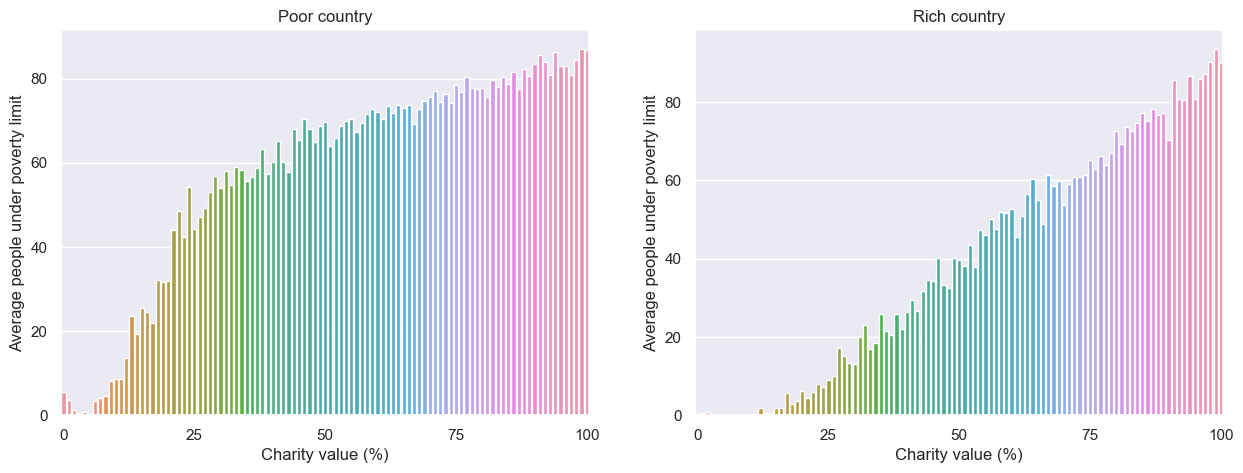

In [61]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.set()

plot_charity_experiment(charity_data_poor, axs[0], title="Poor country")
plot_charity_experiment(charity_data_rich, axs[1], title="Rich country")

We can clearly see that around 3 percent of the charity it looks like the optimal value.

Let's explore depper around this value.

We now plot the average amount of poor people with charity parameter from range 0.0 to 10.0 with step 0.1.
Maximum amount of ticks is 5000.

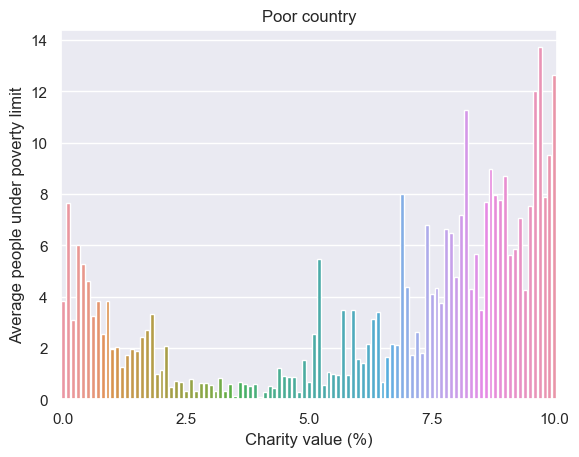

In [12]:
charity_data = process_charity_experiment(
    "data/experiment_charity_0_to_10.csv", charity_int=False
)

plot_charity_experiment(charity_data, plt.gca(), title="Poor country")

As we can see from the graph, the optimal value is around 4 percent.

### Taxes experiment

We now look at the effect of the lower and upper taxes parameters on the relative state treasure.

We do not look now at the amount of poor people, because that will be seen on the relative state treasure (the state is punished for the poor people for every tick).

We first define a help function to process the data for tax experiments.

In [14]:
from typing import Any


def process_tax_experiment(filename: str) -> pd.DataFrame:
    """
    Process the tax experiment data
    """
    taxes_data = process_netlogo_experiment_csv(filename)

    # Convert mean column to float
    taxes_data["[mean]"] = taxes_data["[mean]"].astype(float)

    # Convert taxes' columns to int
    taxes_data["lower-tax"] = taxes_data["lower-tax"].astype(int)
    taxes_data["upper-tax"] = taxes_data["upper-tax"].astype(int)

    return taxes_data


def plot_taxes_heatmap(taxes_data: pd.DataFrame, ax: plt.Axes) -> None:
    # Group rows by the "charity" parameter and calculate the mean of the "mean" column
    grouped_data = taxes_data.groupby(["lower-tax", "upper-tax"])["[mean]"].mean()

    sns.set()

    # Plot the grouped data
    sns.heatmap(grouped_data.unstack(), ax=ax)


def plot_taxes_heatmap_side_by_side(
    poor_data_filename: str, rich_data_filename: str
) -> None:
    poor_data = process_tax_experiment(poor_data_filename)
    rich_data = process_tax_experiment(rich_data_filename)

    fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

    plot_taxes_heatmap(poor_data, axs[0])
    plot_taxes_heatmap(rich_data, axs[1])

    axs[0].set(title="Poor country")
    axs[1].set(title="Rich country")

    # fig.suptitle("Average people under poverty limit")


def plot_taxes_heatmap_filename(filename: str) -> Any:
    taxes_data = process_tax_experiment(filename)

    print("Table shape:", taxes_data.shape)

    fig, ax = plt.subplots()

    return plot_taxes_heatmap(taxes_data, ax)

### Taxes experiment with charity value 2%

In [65]:
taxes_data = process_tax_experiment("data/experiment_taxes_charity_2.csv")

print(taxes_data.shape)
taxes_data.head()

(2205, 12)


,[run number],lower-tax,upper-tax,charity,num-people,percent-best-land,[reporter],[final],[min],[max],[mean],[steps]
0,1,0,0,2,250,16,relative-state-treasure,-0.82,-0.82,0,-0.668992,5000
1,2,0,0,2,250,16,relative-state-treasure,-0.39,-0.39,0,-0.305325,5000
2,3,0,0,2,250,16,relative-state-treasure,-0.84,-0.84,0,-0.641414,5000
3,4,0,0,2,250,16,relative-state-treasure,-2.86,-2.86,0,-1.530856,5000
4,5,0,0,2,250,16,relative-state-treasure,-3.88,-3.88,0,-2.876101,5000


We now plot a heatmap with the lower taxes parameter on the x-axis and the upper taxes parameter on the y-axis. The color represents the relative state treasure.

Table shape: (2205, 12)


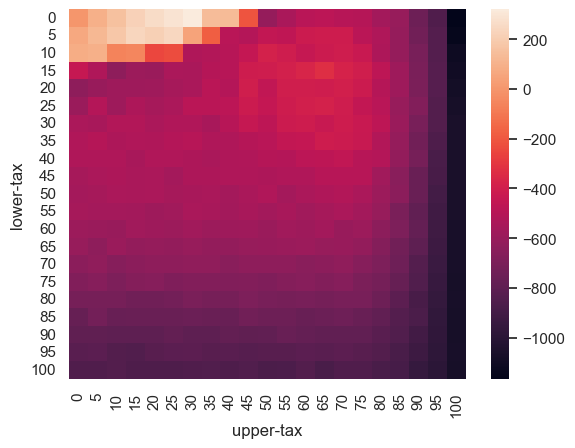

In [75]:
plot_taxes_heatmap_filename("data/experiment_taxes_charity_2.csv")

### Experiment with charity value 4%

Table shape: (2205, 12)


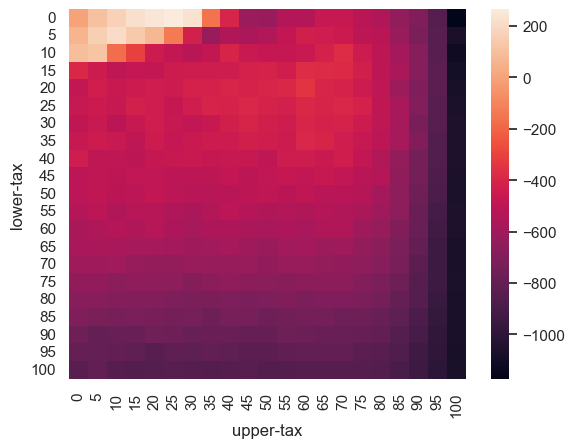

In [76]:
ax = plot_taxes_heatmap_filename("data/experiment_taxes_charity_4.csv")

### Experiment with charity value 6%

Table shape: (2205, 12)


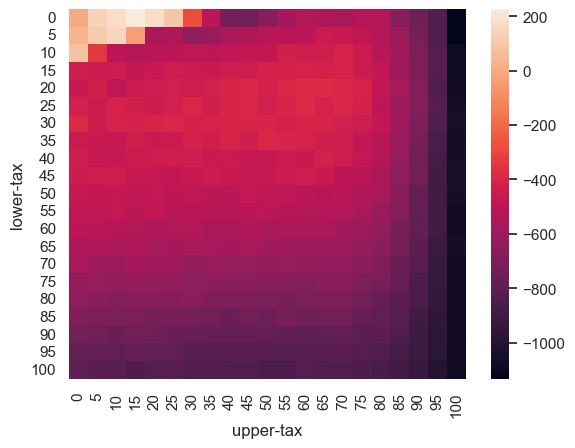

In [77]:
ax = plot_taxes_heatmap_filename("data/experiment_taxes_charity_6.csv")

We can see from the graphs above that with bigger charity the yellow area (the non-negative area) is getting smaller.

We can also observe that there is no need to look deeper into taxes that are bigger than 30% for upper tax and 15% for lower tax, since it is visible that the relative state treasure is negative.

### Model scenerios with "poor" and "rich" countries

In this section, we will analyze the model with two countries, "poor" and "rich" country with with parameter percent-best-land equal to 15% and 25% respectively.

We do experiments with charity values 0%, 2% and 4% and all combinations of lower-tax from 0% to 15% and upper-tax from 0% to 35% (together 6 heatmaps).

Ending tick is 10000.

#### Poor and rich country (side by side)

##### Charity value 0%

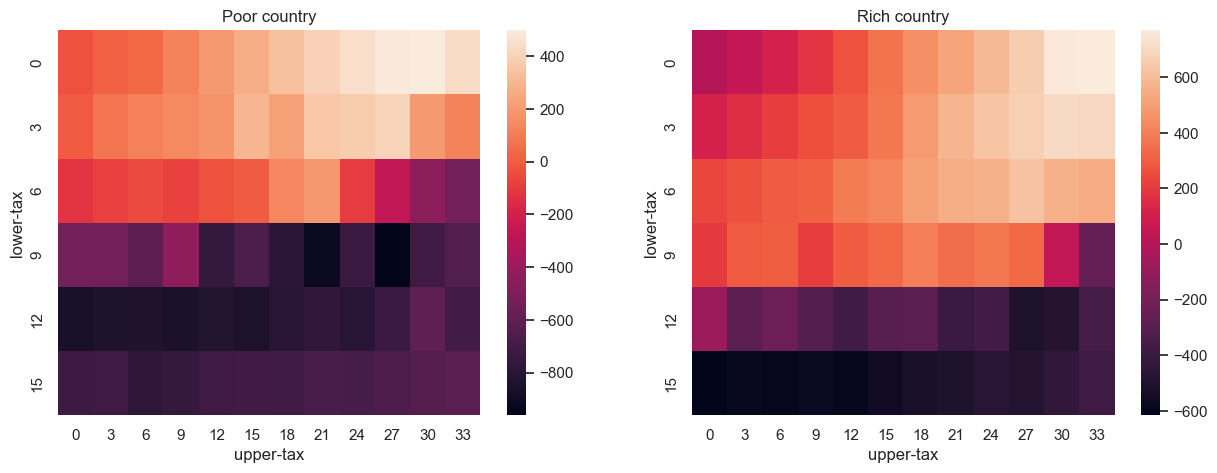

In [84]:
# plot_taxes_heatmap_filename("data/experiment_poor_country_taxes_charity_0.csv")

plot_taxes_heatmap_side_by_side("data/experiment_poor_country_taxes_charity_0.csv", "data/experiment_rich_country_taxes_charity_0.csv")

##### Charity value 2%

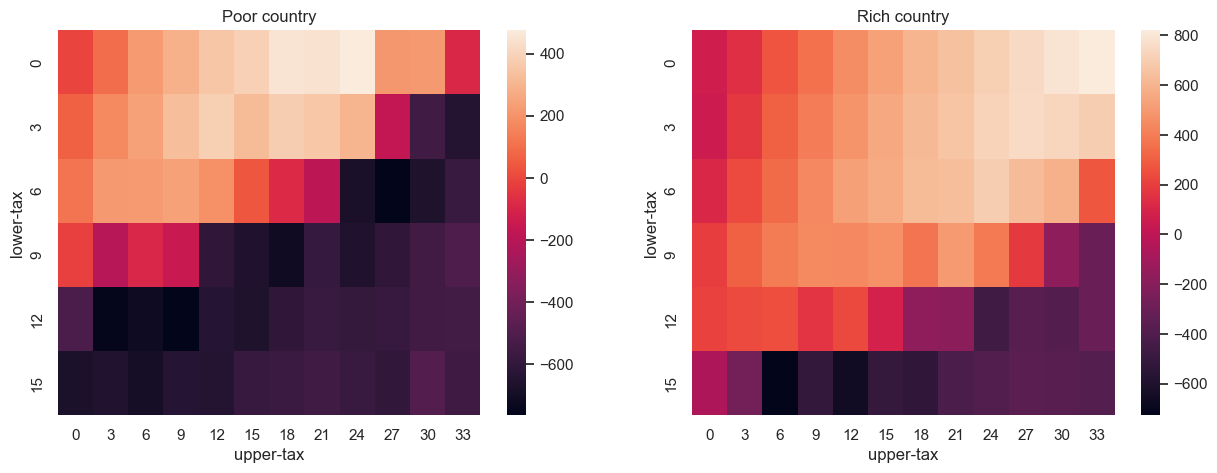

In [86]:
# plot_taxes_heatmap_filename("data/experiment_poor_country_taxes_charity_2.csv")

plot_taxes_heatmap_side_by_side(
    "data/experiment_poor_country_taxes_charity_2.csv",
    "data/experiment_rich_country_taxes_charity_2.csv",
)

##### Charity value 4%

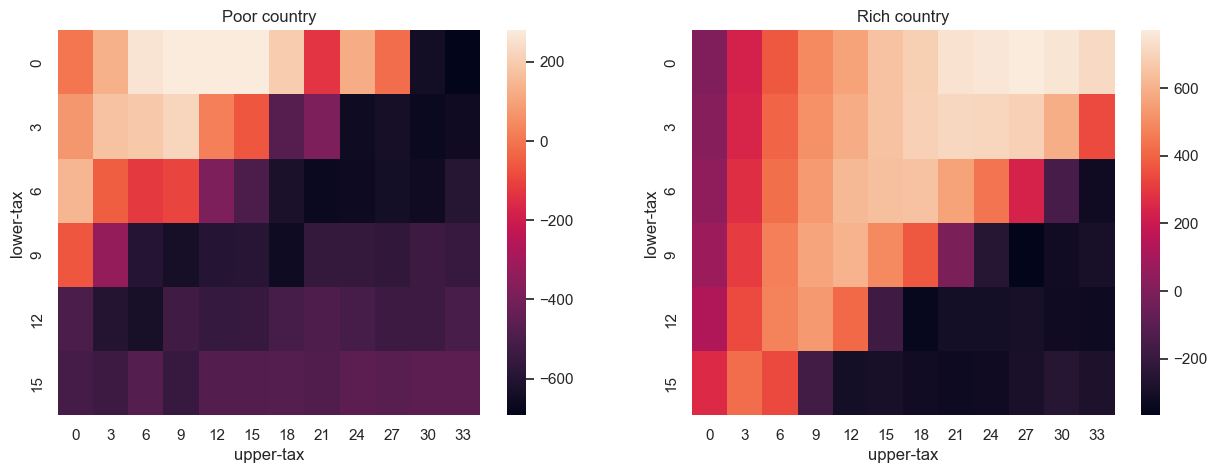

In [87]:
# plot_taxes_heatmap_filename("data/experiment_poor_country_taxes_charity_4.csv")

plot_taxes_heatmap_side_by_side(
    "data/experiment_poor_country_taxes_charity_4.csv",
    "data/experiment_rich_country_taxes_charity_4.csv",
)

#### Rich country

##### Charity value 0%

Table shape: (360, 12)


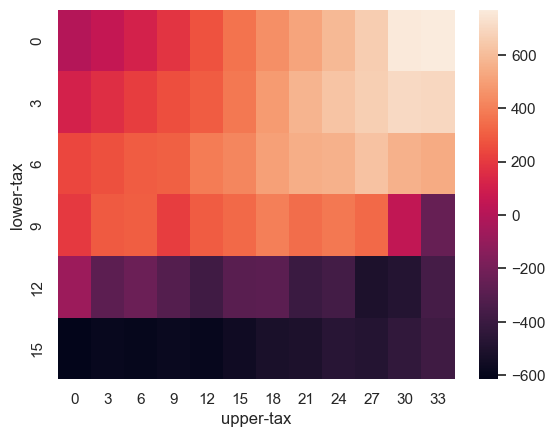

In [15]:
plot_taxes_heatmap_filename("data/experiment_rich_country_taxes_charity_0.csv")

##### Charity value 2%

Table shape: (360, 12)


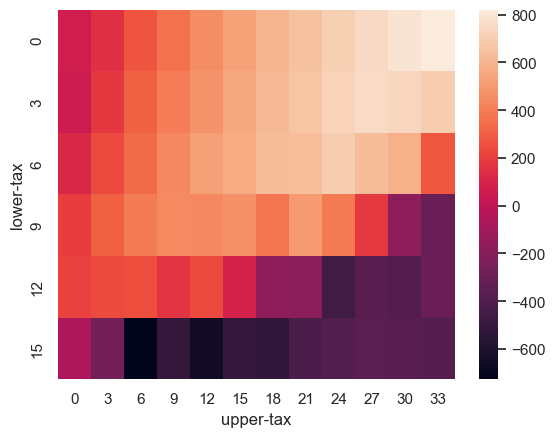

In [16]:
plot_taxes_heatmap_filename("data/experiment_rich_country_taxes_charity_2.csv")

##### Charity value 4%

Table shape: (360, 12)


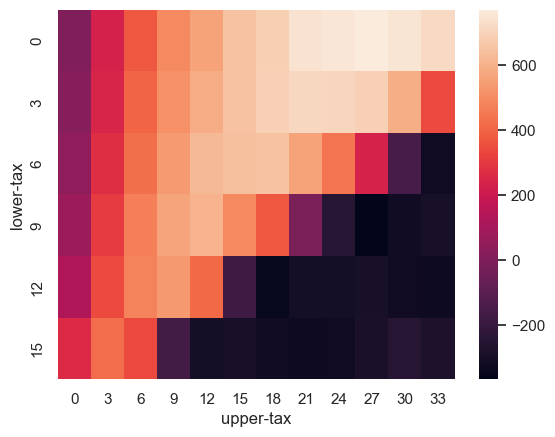

In [14]:
ax = plot_taxes_heatmap_filename("data/experiment_rich_country_taxes_charity_4.csv")

## Look at a typical model scenario

Parameters:
* num-people: 250
* percent-best-land: 15%
* charity: 2%
* lower-tax: 6%
* upper-tax: 8%


Beginning of the simulation (0 ticks) vs. end of the simulation (at 24000 ticks):

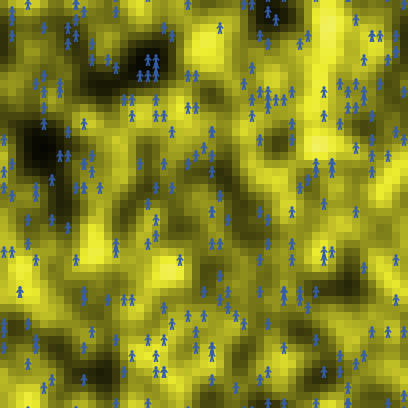
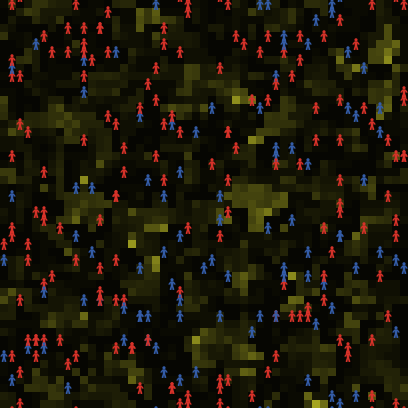
